# CatBoostClassifier #1

### <span style="color:blue"> CatBoost vs. Light GBM vs. XGBoost</span>
źródło danych: https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db

# Zastosowanie  <span style="color:blue"> sklearn.metrics.roc_auc_score</span>

Oblicz obszar pod krzywą charakterystyki operacyjnej odbiornika (ROC AUC) na podstawie wyników prognoz.
Pioniżej robimy prostą definicje żeby potem to szybko obliczyć. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

In [1]:
def auc(m, train, test): 
    from sklearn import metrics
    return (metrics.roc_auc_score(y_train,m.predict_proba(train)[:,1]),
                            metrics.roc_auc_score(y_test,m.predict_proba(test)[:,1]))

### Ocena modelu klasyfikacji

In [2]:
# Classification Assessment
def Classification_Assessment(model ,Xtrain, ytrain, Xtest, ytest, y_pred):
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn import metrics
    from sklearn.metrics import classification_report, confusion_matrix
    from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
    from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report

    print("Recall Training data:     ", np.round(recall_score(ytrain, model.predict(Xtrain)), decimals=4))
    print("Precision Training data:  ", np.round(precision_score(ytrain, model.predict(Xtrain)), decimals=4))
    print("----------------------------------------------------------------------")
    print("Recall Test data:         ", np.round(recall_score(ytest, model.predict(Xtest)), decimals=4)) 
    print("Precision Test data:      ", np.round(precision_score(ytest, model.predict(Xtest)), decimals=4))
    print("----------------------------------------------------------------------")
    print("Confusion Matrix Test data")
    print(confusion_matrix(ytest, model.predict(Xtest)))
    print("----------------------------------------------------------------------")
    print(classification_report(ytest, model.predict(Xtest)))
    
    y_pred_proba = model.predict_proba(Xtest)[::,1]
    fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred)
    auc = metrics.roc_auc_score(ytest, y_pred)
    plt.plot(fpr, tpr, label='Logistic Regression (auc = %0.2f)' % auc)
    plt.xlabel('False Positive Rate',color='grey', fontsize = 13)
    plt.ylabel('True Positive Rate',color='grey', fontsize = 13)
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.legend(loc=4)
    plt.plot([0, 1], [0, 1],'r--')
    plt.show()
    print('auc',auc)

### Kolorowe wydruki

In [3]:
##  colorful prints
def black(text):
     print('\033[30m', text, '\033[0m', sep='')  
def red(text):
     print('\033[31m', text, '\033[0m', sep='')  
def green(text):
     print('\033[32m', text, '\033[0m', sep='')  
def yellow(text):     print('\033[33m', text, '\033[0m', sep='')  
def blue(text):
     print('\033[34m', text, '\033[0m', sep='') 
def magenta(text):
     print('\033[35m', text, '\033[0m', sep='')  
def cyan(text):
     print('\033[36m', text, '\033[0m', sep='')  
def gray(text):
     print('\033[90m', text, '\033[0m', sep='')

# <span style="color:red"> START</span>

In [4]:
import pandas as pd 
import numpy as np 
import time 
from sklearn.model_selection import train_test_split

df = pd.read_csv("/home/wojciech/Pulpit/3/flights.csv")

## Pobranie 10% próbki losowej
df = df.sample(frac = 0.1, random_state=10)
df.head()
blue(df.shape)

/home/wojciech/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(581908, 31)


### Zawężenie danych do wybranych kolumn

In [5]:
df = df[["MONTH","DAY","DAY_OF_WEEK","AIRLINE","FLIGHT_NUMBER","DESTINATION_AIRPORT",
                 "ORIGIN_AIRPORT","AIR_TIME", "DEPARTURE_TIME","DISTANCE","ARRIVAL_DELAY"]]

### Analiza kompletności danych

In [6]:
df.isnull().sum()

MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
DESTINATION_AIRPORT        0
ORIGIN_AIRPORT             0
AIR_TIME               10569
DEPARTURE_TIME          8742
DISTANCE                   0
ARRIVAL_DELAY          10569
dtype: int64

In [7]:
import seaborn as sns

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Usuwanie braków

In [8]:
df.dropna(inplace=True)
blue(df.isnull().sum())
print()
cyan(df.shape)

MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
DESTINATION_AIRPORT    0
ORIGIN_AIRPORT         0
AIR_TIME               0
DEPARTURE_TIME         0
DISTANCE               0
ARRIVAL_DELAY          0
dtype: int64

(571339, 11)


## Kodowanie na wartości kategoryczne kolumny: "ARRIVAL_DELAY"

In [9]:
blue(df["ARRIVAL_DELAY"].head(3))

411984       1.0
3591965    337.0
526451     -19.0
Name: ARRIVAL_DELAY, dtype: float64


In [10]:
df["ARRIVAL_DELAY"] = (df["ARRIVAL_DELAY"]>10)*1

In [11]:
blue(df["ARRIVAL_DELAY"].head(3))
cyan(df["ARRIVAL_DELAY"].value_counts())

411984     0
3591965    1
526451     0
Name: ARRIVAL_DELAY, dtype: int64
0    446235
1    125104
Name: ARRIVAL_DELAY, dtype: int64


In [12]:
blue(df.dtypes)

MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
DESTINATION_AIRPORT     object
ORIGIN_AIRPORT          object
AIR_TIME               float64
DEPARTURE_TIME         float64
DISTANCE                 int64
ARRIVAL_DELAY            int64
dtype: object


In [13]:
cols = ["AIRLINE","FLIGHT_NUMBER","DESTINATION_AIRPORT","ORIGIN_AIRPORT"]
for item in cols:
    df[item] = df[item].astype("category").cat.codes +1

blue(df.dtypes)    

MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                   int8
FLIGHT_NUMBER            int16
DESTINATION_AIRPORT      int16
ORIGIN_AIRPORT           int16
AIR_TIME               float64
DEPARTURE_TIME         float64
DISTANCE                 int64
ARRIVAL_DELAY            int64
dtype: object


### Koduje wartości dyskretne

In [14]:
df.head(5)

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,DESTINATION_AIRPORT,ORIGIN_AIRPORT,AIR_TIME,DEPARTURE_TIME,DISTANCE,ARRIVAL_DELAY
411984,1,28,3,14,102,717,608,102.0,713.0,634,0
3591965,8,11,2,3,152,748,690,134.0,111.0,1028,1
526451,2,4,3,4,1184,597,740,111.0,1734.0,931,0
1336011,3,27,5,14,170,770,609,173.0,1807.0,1436,0
3424502,8,1,6,14,4321,772,544,63.0,2151.0,481,1


In [15]:
cols = ["AIRLINE","FLIGHT_NUMBER","DESTINATION_AIRPORT","ORIGIN_AIRPORT"]
for item in cols:
    df[item] = df[item].astype("category").cat.codes +1

blue(df.dtypes)  

MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                   int8
FLIGHT_NUMBER            int16
DESTINATION_AIRPORT      int16
ORIGIN_AIRPORT           int16
AIR_TIME               float64
DEPARTURE_TIME         float64
DISTANCE                 int64
ARRIVAL_DELAY            int64
dtype: object


In [16]:
df.head(5)

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,DESTINATION_AIRPORT,ORIGIN_AIRPORT,AIR_TIME,DEPARTURE_TIME,DISTANCE,ARRIVAL_DELAY
411984,1,28,3,14,102,717,608,102.0,713.0,634,0
3591965,8,11,2,3,152,748,690,134.0,111.0,1028,1
526451,2,4,3,4,1184,597,740,111.0,1734.0,931,0
1336011,3,27,5,14,170,770,609,173.0,1807.0,1436,0
3424502,8,1,6,14,4321,772,544,63.0,2151.0,481,1


### Dziele zbiór na testowy i treningowy

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(["ARRIVAL_DELAY"], axis=1), df["ARRIVAL_DELAY"],
                                                random_state=10, test_size=0.25)

## Szukamy zmiennych kategorycznych
Które zmienne wydają sie być powtarzalnymi kodami- wszystkie ponieważ mamy próbkę 500 tys. Jak czegoś jest 1400 unikalnych wystąpień.  

In [18]:
for col in X_train.columns:
     print(col, X_train[col].nunique())

MONTH 12
DAY 31
DAY_OF_WEEK 7
AIRLINE 14
FLIGHT_NUMBER 6641
DESTINATION_AIRPORT 816
ORIGIN_AIRPORT 827
AIR_TIME 599
DEPARTURE_TIME 1400
DISTANCE 1321


Deklarujemy, że pierwsze 7 kolumn to są wartości kategoryczne, deklaracja: 'cat_features_index'

In [19]:
import catboost as cb
cat_features_index = [0,1,2,3,4,5,6]

### Określamy parametry modelu

In [20]:
params = {'depth': [4, 7, 10],
          'learning_rate' : [0.03, 0.1, 0.15],
         'l2_leaf_reg': [1,4,9],
         'iterations': [300]}

https://catboost.ai/docs/concepts/parameter-tuning.html

https://catboost.ai/docs/search/?query=scoring

<span style="color:blue">'depth'</span> W większości przypadków optymalna głębokość wynosi od 4 do 10. Zalecane są wartości z zakresu od 6 do 10.

<span style="color:blue">'iterations'</span> To ustawienie służy do zmniejszenia stopnia gradientu. Wpływa na całkowity czas treningu: im mniejsza wartość, tym więcej iteracji jest wymaganych do treningu. Wybierz wartość w oparciu o oczekiwania dotyczące wydajności.

Domyślnie szybkość uczenia się jest definiowana automatycznie na podstawie właściwości zestawu danych i liczby iteracji. Automatycznie zdefiniowana wartość powinna być zbliżona do optymalnej.

Możliwe sposoby dostosowania współczynnika uczenia się w zależności od przeszacowania wyników:
Ostatnie powtórzenia treningu nie są nadmierne (trening się nie zbiega) - zwiększ tempo uczenia się.
Wykryto przeuczenie - zmniejsz tempo uczenia się.


<span style="color:blue">'l2_leaf_reg'</span> Współczynnik na poziomie regularyzacji L2 funkcji kosztu.
Każda wartość dodatnia jest dozwolona.

<span style="color:blue">'iterations'</span> Maksymalna liczba drzew, które można zbudować podczas rozwiązywania problemów z uczeniem maszynowym. W przypadku używania innych parametrów ograniczających liczbę iteracji ostateczna liczba drzew może być mniejsza niż liczba określona w tym parametrze.

# Model CatBoost Classifier - <span style="color:blue">Cross-validation</span> 
## <span style="color:red"> bez wartości kategorycznych!</span>


In [21]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier

cb = cb.CatBoostClassifier()
kot_model = GridSearchCV(cb, params, scoring="roc_auc", cv = 3)
kot_model.fit(X_train, y_train)

0:	learn: 0.6811706	total: 102ms	remaining: 30.5s
1:	learn: 0.6698888	total: 151ms	remaining: 22.4s
2:	learn: 0.6594070	total: 196ms	remaining: 19.4s
3:	learn: 0.6496957	total: 245ms	remaining: 18.1s
4:	learn: 0.6405738	total: 297ms	remaining: 17.5s
5:	learn: 0.6320681	total: 361ms	remaining: 17.7s
6:	learn: 0.6240027	total: 410ms	remaining: 17.2s
7:	learn: 0.6164190	total: 458ms	remaining: 16.7s
8:	learn: 0.6093154	total: 505ms	remaining: 16.3s
9:	learn: 0.6029027	total: 556ms	remaining: 16.1s
10:	learn: 0.5966911	total: 612ms	remaining: 16.1s
11:	learn: 0.5908822	total: 659ms	remaining: 15.8s
12:	learn: 0.5855282	total: 713ms	remaining: 15.7s
13:	learn: 0.5802417	total: 764ms	remaining: 15.6s
14:	learn: 0.5754715	total: 819ms	remaining: 15.6s
15:	learn: 0.5711565	total: 890ms	remaining: 15.8s
16:	learn: 0.5669137	total: 939ms	remaining: 15.6s
17:	learn: 0.5630068	total: 1s	remaining: 15.7s
18:	learn: 0.5593976	total: 1.07s	remaining: 15.8s
19:	learn: 0.5558840	total: 1.12s	remaining:

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=<catboost.core.CatBoostClassifier object at 0x7efc3b537310>,
             iid='warn', n_jobs=None,
             param_grid={'depth': [4, 7, 10], 'iterations': [300],
                         'l2_leaf_reg': [1, 4, 9],
                         'learning_rate': [0.03, 0.1, 0.15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [22]:
pred_y1 = kot_model.predict(X_test)
blue(pred_y1)

[1 0 0 ... 0 0 0]


### Ocena krzywej AUC

In [23]:
blue(auc(kot_model, X_train, X_test))

(0.8011110726367839, 0.7539610514150201)


Recall Training data:      0.2216
Precision Training data:   0.8182
----------------------------------------------------------------------
Recall Test data:          0.1885
Precision Test data:       0.7297
----------------------------------------------------------------------
Confusion Matrix Test data
[[109458   2178]
 [ 25319   5880]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.98      0.89    111636
           1       0.73      0.19      0.30     31199

    accuracy                           0.81    142835
   macro avg       0.77      0.58      0.59    142835
weighted avg       0.79      0.81      0.76    142835



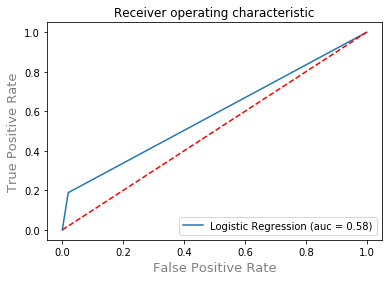

auc 0.5844788717760748


In [24]:
Classification_Assessment(kot_model ,X_train, y_train, X_test, y_test, pred_y1)

### Wyjaśnienie:
<span style="color:blue">cb.CatBoostClassifier()</span> może oznaczać poprostu 'import catboost as cb'
<span style="color:blue">GridSearchCV</span>  https://catboost.ai/docs/features/cross-validation.html?lang=en

## Model CatBoost Classifier 
## <span style="color:red">Ze zmiennymi kategorialnymi!</span>


#### <span style="color:red">one_hot_max_size</span>  
W przypadku pozostałych kolumn kategorialnych, które mają unikalną liczbę kategorii większą niż one_hot_max_size, CatBoost stosuje wydajną metodę kodowania, która jest podobna do kodowania średniego, ale redukuje nadmierne dopasowanie. Proces przebiega w ten sposób -
1. Umożliwiając zestaw obserwacji wejściowych w losowej kolejności. Generowanych jest wiele losowych permutacji
2. Przekształcanie wartości etykiety z liczb zmiennoprzecinkowych lub kategorii na liczbę całkowitą
3. Wszystkie wartości funkcji kategorialnych są przekształcane na wartości liczbowe przy użyciu następującego wzoru:

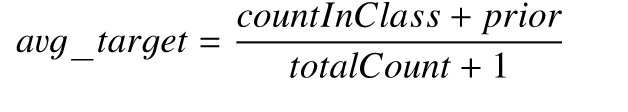

CountInClass to ile razy wartość etykiety była równa „1”
TotalCount to całkowita liczba obiektów (do bieżącego), które mają kategorialną wartość cechy odpowiadającą bieżącemu. Prior to wartość początkowa licznika

In [25]:
## With Categorical features

import catboost as cb

cat_features_index = [0,1,2,3,4,5,6]
SKO = cb.CatBoostClassifier(eval_metric="AUC",one_hot_max_size=31, depth=10, iterations= 500, l2_leaf_reg= 9, learning_rate= 0.15)

SKO.fit(X_train,y_train, cat_features= cat_features_index)

0:	total: 518ms	remaining: 4m 18s
1:	total: 1.13s	remaining: 4m 40s
2:	total: 1.68s	remaining: 4m 38s
3:	total: 2.25s	remaining: 4m 39s
4:	total: 2.83s	remaining: 4m 40s
5:	total: 3.4s	remaining: 4m 40s
6:	total: 3.93s	remaining: 4m 36s
7:	total: 4.49s	remaining: 4m 36s
8:	total: 5.14s	remaining: 4m 40s
9:	total: 5.87s	remaining: 4m 47s
10:	total: 6.46s	remaining: 4m 47s
11:	total: 7.05s	remaining: 4m 46s
12:	total: 7.76s	remaining: 4m 50s
13:	total: 8.45s	remaining: 4m 53s
14:	total: 9.07s	remaining: 4m 53s
15:	total: 9.61s	remaining: 4m 50s
16:	total: 10.3s	remaining: 4m 52s
17:	total: 10.9s	remaining: 4m 52s
18:	total: 11.5s	remaining: 4m 51s
19:	total: 12.1s	remaining: 4m 51s
20:	total: 12.8s	remaining: 4m 51s
21:	total: 13.4s	remaining: 4m 50s
22:	total: 14s	remaining: 4m 50s
23:	total: 14.6s	remaining: 4m 50s
24:	total: 15.3s	remaining: 4m 50s
25:	total: 16s	remaining: 4m 50s
26:	total: 16.6s	remaining: 4m 51s
27:	total: 17.2s	remaining: 4m 49s
28:	total: 17.8s	remaining: 4m 49s


### Predykcja modelu

In [26]:
pred_y2 = SKO.predict(X_test)
blue(pred_y2)

[1 0 0 ... 0 0 0]


### Ocena krzywej AUC

In [27]:
blue(auc(SKO, X_train, X_test))

(0.911406008742772, 0.8392343892749539)


### Ocena modelu klasyfrikacji

Recall Training data:      0.395
Precision Training data:   0.9609
----------------------------------------------------------------------
Recall Test data:          0.3332
Precision Test data:       0.8439
----------------------------------------------------------------------
Confusion Matrix Test data
[[109713   1923]
 [ 20805  10394]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.98      0.91    111636
           1       0.84      0.33      0.48     31199

    accuracy                           0.84    142835
   macro avg       0.84      0.66      0.69    142835
weighted avg       0.84      0.84      0.81    142835



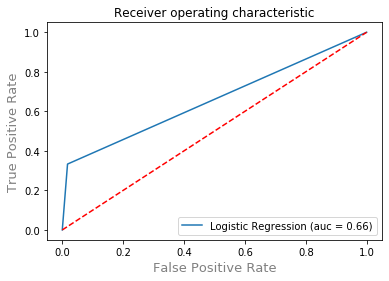

auc 0.6579630387190691


In [28]:
Classification_Assessment(SKO ,X_train, y_train, X_test, y_test, pred_y2)

CAtboost działa dobrze dlatego, że rozważaliśmy zmienne kategoryczne i dostrajaliśmy one_hot_max_size. Jeśli nie skorzystamy z tych funkcji CatBoost, okazało się, że jest najgorzej działający z dokładnością zaledwie 0,752.Dlatego dowiedzieliśmy się, że CatBoost działa dobrze tylko wtedy, gdy mamy zmienne jakościowe w danych i odpowiednio je dostroimy.